In [1]:
import numpy as np
import sympy
from sympy import S, Symbol, symbols, solve, solveset, integrate, Integral, diff, plot_parametric, plot_implicit, latex, plot
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
import matplotlib.pyplot as plt

## Занятие 12
## Математический анализ
## Применение интегралов для вычисления объема тела вращения
Пусть тело ограничено поверхностью, образованной вращением графика функции $f(x)$ вокруг оси OX.
### Объем тела вращения вокруг оси ОХ
$$
V_{OX}=\pi\int\limits_a^b f^2(x)\,dx
$$
### Пример 1
Вычислить объем тела вращения вокруг ОХ фигуры, образованной параболой $y = kx - x^2$, $k > 0$ и осью ОХ.

In [2]:
k = Symbol('k', positive=True)
x = Symbol('x')
y = k*x - x**2
roots = solveset(y, x, domain=S.Reals)
a = min(roots)
b = max(roots)
V_OX = Pi*Integral(y**2, (x, a, b))
display(sympy.Eq(V_OX, V_OX.doit()))

Eq(pi*Integral((k*x - x**2)**2, (x, 0, k)), pi*k**5/30)

### Объем тела вращения, ограниченного параметрически заданной кривой
Пусть тело ограничено кривой, заданной параметрически:
$$
\left\{
\begin{matrix}
x = \phi(t)\\
y = \psi(t)
\end{matrix}
\right.
\qquad t \in [a, b]
$$
тогда объем тела можно вычислить по формуле
$$
V_{OX}=\pi\int\limits_a^b \psi^2(t)\frac{d\phi(t)}{dt}\,dt.
$$
### Пример 2.
Вычислить объем эллипсоида, получающегося вращением вокруг ОХ эллипса $\frac{x^2}{a^2}+\frac{y^2}{b^2}=1$
Используем параметрические уравнения эллипса:
$$
\left\{
\begin{matrix}
x=a\cos t\\
y=b\sin t
\end{matrix}
\right.
$$
Заметим, что $\frac{d(a\cos t)}{dt}=-a\sin t\, dt$, а верхняя дуга эллипса получается при $t$ от 0 до $\pi$, получим формулу для объема:
$$
V_{OX}=-a\pi\int\limits_{0}^{\pi}(b\sin t)^2\sin t\, dt=-ab^2\pi\int\limits_{0}^{\pi}\sin^3 t\, dt
$$

In [3]:
a, b = symbols('a b', positive=True)
t = Symbol('t')
x = a*Cos(t)
y = b*Sin(t)
V_OX = Pi*Integral(y**2*x.diff(t), (t, Pi, 0))
display(sympy.Eq(V_OX, V_OX.doit()))

Eq(pi*Integral(-a*b**2*sin(t)**3, (t, pi, 0)), 4*pi*a*b**2/3)

### Объем тела вращения в полярной системе координат.
Объем тела, полученного при вращении сектора, ограниченного дугой кривой $r = F(\phi)$  и двумя полярными радиусами $\phi = \alpha$, $\phi = \beta$, вокруг полярной оси:
$$
V_p = \frac23\pi\int_\alpha^\beta r^3\sin\phi\,d\phi.
$$
По этой формуле можно вычислять объем тела вращения вокруг полярной оси фигуры, органиченной замкнутой кривой, заданной в полярных координатах.
### Пример 3.
Найти объем тела, которое получается вращением кардиоиды $r = a(1+\cos\phi)$ вокруг полярной оси.
Вначале построим график кардиоиды в полярной системе координат.
В sympy нет инструмента для построения таких графиков непосредственно, можно воспользоваться plot_parametric, замечая, что
$$
\left\{
\begin{matrix}
x = r\cos\phi\\
y = r\sin\phi
\end{matrix}
\right.,
$$
но можно воспользоваться функцией polar из matplotlib.pyplot, передавая linspace значений угла $\phi$ и функцию $r = F(\phi)$, а нашем случае $r = a(1+\cos\phi)$.

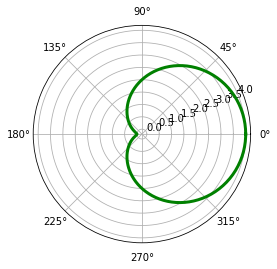

In [4]:
Phi = np.linspace(0, 2*np.pi, 256)
R = 2*(1 + np.cos(Phi))
plt.polar(Phi, R, color='green', lw=3)

Верхняя дуга кардиоиды соответствует интервалу $[0, \pi]$ значений  угла $\phi$, поэтому пределы интегрирования будут 0 и $\pi$

In [5]:
phi, a = symbols('phi a')
r = a*(1 + Cos(phi))
V_p = S(2)/3*Pi*Integral(r**3*Sin(phi), (phi, 0, Pi))
display(sympy.Eq(V_p, V_p.doit()))

Eq(2*pi*Integral(a**3*(cos(phi) + 1)**3*sin(phi), (phi, 0, pi))/3, 8*pi*a**3/3)

### Объем тела, образованного вращением фигуры, ограниченной кривыми $y_1 = f_1(x)$ и $y_2 = f_2(x)$, $f_1(x) \le f_2(x)$ и прямыми $x = a$, $x = b$, вокруг оси ОХ 
$$
V_{OX}=\pi\int\limits_a^b (f_2^2(x) - f_1^2(x))\,dx.
$$
### Пример 4. 
Вычислить объем тела, получающегося вращением вокруг ОХ фигуры, ограниченной параболами $y=x^2$ и $y=\sqrt x$.

Вначале изобразим на графике обе кривые и найдем пределы инетгрирования, решая уравнение:

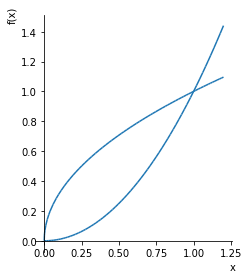

0 1


In [17]:
x = Symbol('x')
y1 = x**2
y2 = x**S.Half
plot(y1, y2, (x, 0, 1.2), aspect_ratio=(1, 1))
roots = solve(sympy.Eq(y1, y2))
a = min(roots)
b = max(roots)
print(a, b)

Объем тела вращения получится как разность объемов тел, полученных вращением кадждой функции отдельно, интегрирование ведется от 0 до 1. Воспользуемся линейностью интеграла:

In [7]:
V_OX = Pi*Integral(y2**2-y1**2, (x, a, b))
display(sympy.Eq(V_OX, V_OX.doit()))

Eq(pi*Integral(-x**4 + x, (x, 0, 1)), 3*pi/10)

## Объем тела, получающегося вращением вокруг ОY.
#### Случай 1.
Пусть тело ограничено поверхностью, полученной при вращении вокруг оси ОY фигуры, ограниченной графиком $f(x)$  при $x$ от $a$ до $b$ и прямыми $x = a$ и $x = b$.
Этот объем вычисляется по формуле
$$
V_{OY} = 2\pi\int\limits_a^b xf(x)\,dx
$$
### Пример 5. 
Вычислить объем тела, получающегося вращением вокруг ОY фигуры, ограниченной полукубической параболой $y^2 = x^3$, осью ОХ и прямой $x = 1$. Вначале построим график фигуры, которую вращают около оси ОY.

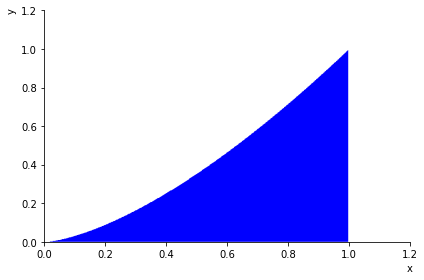

In [19]:
x, y = symbols('x y')
plot_implicit(sympy.And(y**2 < x**3, x < 1), (x, 0, 1.2), (y, 0, 1.2))

In [16]:
y1 = x**(S(3)/2)
V_OY = 2*Pi*Integral(x*y1, (x, 0, 1))
display(sympy.Eq(V_OY, V_OY.doit()))

Eq(2*pi*Integral(x**(5/2), (x, 0, 1)), 4*pi/7)

#### Случай 2.
Пусть тело ограничено поверхностью, полученной при вращении вокруг оси ОY фигуры, ограниченной графиком $f(x)$  и  прямыми $y = c$ и $y = d$.
Этот объем вычисляется по формуле
$$
V_{OY}=\pi\int\limits_c^d x^2(y)\,dy
$$
### Пример 6. 
Вычислить объем тела, получающегося вращением вокруг ОY фигуры, ограниченной полукубической параболой $y^2=x^3$, осью ОY и прямой $y=1$.

Изобразим на графике фигуру, вращающуюся около оси OY в примере 5

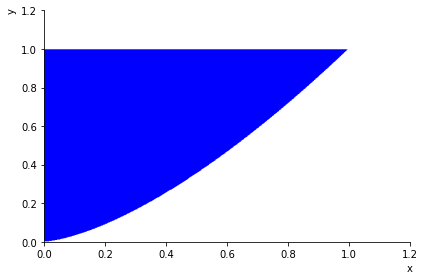

In [21]:
x, y = symbols('x y')
plot_implicit(sympy.And(y**2 > x**3, y < 1), (x, 0, 1.2), (y, 0, 1.2))

In [11]:
x = y**(S(2)/3)
V_OY = Pi*Integral(x**2, (y, 0, 1))
display(sympy.Eq(V_OY, V_OY.doit()))

Eq(pi*Integral(y**(4/3), (y, 0, 1)), 3*pi/7)

### Объем тела, образованного вращением фигуры, ограниченной кривыми $y_1 = f_1(x)$ и $y_2 = f_2(x)$, $f_1(x) \le f_2(x)$ и прямыми $x = a$, $x = b$, вокруг оси ОY 
$$
V_{OY}=2\pi\int\limits_a^b x(f_2(x) - f_1(x))\,dx.
$$
### Пример 7.
Вычислить объем тела, получающегося вращением вокруг ОY фигуры, ограниченной параболами $y=x^2$ и $y=\sqrt x$ (см. Пример 4).

В силу симметрии вращаемой фигуры относительно биссектрисы первой координатной четверти результат будет такой же, как в Примере 4.

In [13]:
x = Symbol('x')
y1 = x**2
y2 = x**S.Half
V_OY = 2*Pi*Integral(x*(y2 - y1), (x, 0, 1))
display(sympy.Eq(V_OY, V_OY.doit()))

Eq(2*pi*Integral(x*(sqrt(x) - x**2), (x, 0, 1)), 3*pi/10)

## Вычисление объема тела вращения по известным поперечным сечениям.
Пусть $S = S(x)$ - площадь сечения тела плоскостью, перпендикулярной к некоторой прямой (которую принимаем за ось OX), в точке с абсциссой $x$, то объем этого тела равен
$$
V = \int_{x_1}^{x_2} S(x)\, dx,
$$
где $x_1$ и $x_2$ - абсциссы крайних сечений тела.

### Пример 8.
Определить объем клина, отсеченного от круглого цилиндра плоскостью, проходящей через диаметр основания и наклоненной к основанию под углом $\alpha$. Радиус основания равен $R$.

Примем за ось OX диаметр основания, по которому секущая плоскость пересекает основание, и за ось OY диаметр основания, ему перпендикулярный. Уравнение окружности основания будет $x^2 + y^2 = R^2$.
Площадь сечения ABC, отстоящего на расстоянии $x$ от начала координат O, равна
$$
S(x) = S(ABC) = \frac12 AB\cdot BC = \frac12 y^2{\rm tg} \alpha.
$$
Учтем, что $y^2 = R^2 - x^2$.
Абсциссы крайних точек сечений тела в нашем случае  $-R$ и $R$.

In [12]:
x, alpha, R = symbols('x, alpha, R')
y2 = R**2 - x**2
(sympy.tan(alpha)*y2/2).integrate((x, -R, R))

2*R**3*tan(alpha)/3